In [1]:
import os
import pandas_datareader as pdr
from datetime import datetime
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web

api_key='b730118110e1435655fb715f88bdd73c5d8b8b56'
start = datetime(2005,1,1)
end = datetime(2020,4,17)
csv_name = 'cdns.csv'
csv_name2 = 'snps.csv'

In [2]:
#df1=pdr.get_data_tiingo('CDNS',start=start,api_key=api_key)
#df1.to_csv(csv_name)
#df1.tail()


In [3]:

#df_snps=pdr.get_data_tiingo('SNPS',start=start, end=end,api_key=api_key)
#df_snps.to_csv(csv_name2)

In [4]:
df_snps = pd.read_csv(csv_name2)
df_snps['date']= pd.to_datetime(df_snps['date']).apply(lambda x: x.replace(tzinfo=None))
df_snps.set_index('date', inplace = True)
df_snps = df_snps.loc[:,'close'].to_frame()

In [5]:
df_snps.tail()

,close
date,
2020-04-13,140.13
2020-04-14,147.43
2020-04-15,146.17
2020-04-16,151.83
2020-04-17,154.98


In [6]:

#df_dji = web.DataReader('BCB/UDJIAD1', 'quandl', start=start)
#df_dji.to_csv('djia.csv')

In [7]:
#df_dji.head()

In [8]:
df1 = pd.read_csv(csv_name)
df1['date']= pd.to_datetime(df1['date']).apply(lambda x: x.replace(tzinfo=None)) 
df1


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,CDNS,2005-01-03,13.750,14.06,13.68,13.90,980400,13.750,14.06,13.68,13.90,980400,0.0,1.0
1,CDNS,2005-01-04,13.300,13.80,13.10,13.75,1886300,13.300,13.80,13.10,13.75,1886300,0.0,1.0
2,CDNS,2005-01-05,13.310,13.40,13.22,13.27,1926100,13.310,13.40,13.22,13.27,1926100,0.0,1.0
3,CDNS,2005-01-06,13.340,13.40,13.11,13.32,1389600,13.340,13.40,13.11,13.32,1389600,0.0,1.0
4,CDNS,2005-01-07,13.280,13.43,13.05,13.36,2400200,13.280,13.43,13.05,13.36,2400200,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,CDNS,2020-04-13,71.550,71.75,70.40,70.97,2521654,71.550,71.75,70.40,70.97,2521654,0.0,1.0
3845,CDNS,2020-04-14,76.325,76.50,72.26,73.00,2511049,76.325,76.50,72.26,73.00,2511049,0.0,1.0
3846,CDNS,2020-04-15,75.700,76.17,74.27,74.91,2245583,75.700,76.17,74.27,74.91,2245583,0.0,1.0
3847,CDNS,2020-04-16,78.590,79.17,76.01,76.01,2603334,78.590,79.17,76.01,76.01,2603334,0.0,1.0


In [9]:
#df1['close'].plot()
#x=df1.index.get_level_values('date')
#df1.iloc[:,[0,1,2]].plot()
#df2=df1.xs('SNPS',level='symbol')
df1.set_index('date', inplace = True)


In [10]:
df_dji = pd.read_csv('^DJI.csv')
df_dji['Date'] = pd.to_datetime(df_dji['Date'])
#df_dji['DJIA‘] = pd.to_numeric(df_dji['DATE'])
df_dji['Close'] = pd.to_numeric(df_dji['Close'], errors='coerce')


In [11]:
df_dji.set_index('Date',inplace = True)



In [12]:
df_dji.dropna(inplace=True)
print (df_dji.shape)
df_dji.head()
df_dji = df_dji.loc['2010-04-05':,'Close']

(8877, 6)


In [13]:
df2 = df1.loc['2010-04-05':, 'close']
df2 = df2.to_frame()

In [14]:

df3 = df2.join(df_dji,how='inner')
df3.rename(columns ={'close': 'CDNS Close','Close':'DJIA Close'},inplace =True)
df3 = df3.join(df_snps, how='inner')
df3.rename(columns ={'close': ' Close','Close':'DJIA Close'},inplace =True)

In [15]:
df3.head()
df3.tail()

,CDNS Close,DJIA Close,Close
date,,,
2020-04-13,71.550,23390.769531,140.13
2020-04-14,76.325,23949.759766,147.43
2020-04-15,75.700,23504.349609,146.17
2020-04-16,78.590,23537.679688,151.83
2020-04-17,78.650,24242.490234,154.98


In [16]:
df3.corr()


,CDNS Close,DJIA Close,Close
CDNS Close,1.000000,0.936464,0.993540
DJIA Close,0.936464,1.000000,0.944894
Close,0.993540,0.944894,1.000000


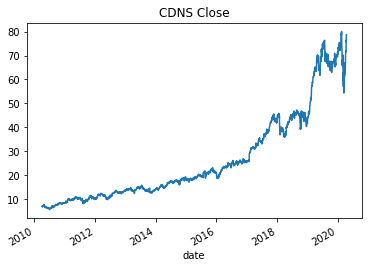

In [17]:
analysis_tgt='CDNS Close'
df3[analysis_tgt].plot(title=analysis_tgt)
#df3['DJIA'].plot()


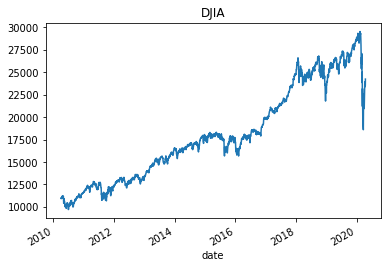

In [18]:
df3['DJIA Close'].plot(title= 'DJIA')


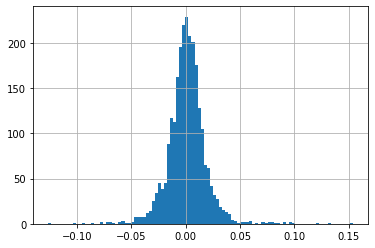

In [19]:
df3[analysis_tgt].pct_change().hist(bins=100)
#df3[analysis_tgt].pct_change().plot.kde()

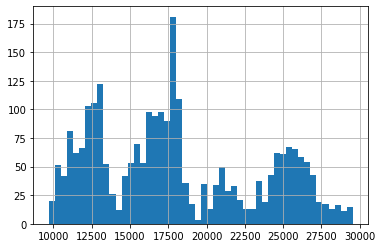

In [20]:
df3['DJIA Close'].hist(bins=50)


In [21]:
df3[analysis_tgt].pct_change().mean()


0.0011180103200491647

In [22]:
df3[analysis_tgt].pct_change().median()


0.0011078286558345862

In [23]:
df3[analysis_tgt].pct_change().max()


0.15365673479438557

In [24]:
df3[analysis_tgt].pct_change().min()


-0.12598047062590034

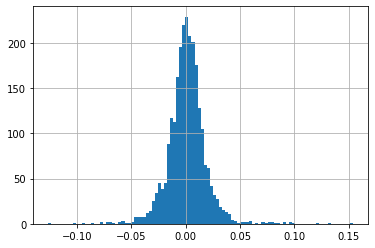

In [25]:
df3[analysis_tgt].pct_change().hist(bins=100)


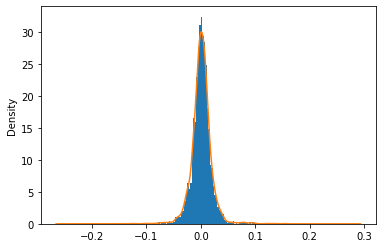

In [26]:
df3[analysis_tgt].pct_change().hist(bins=100,density=True)
df3[analysis_tgt].pct_change().plot.kde()


In [27]:
df3[analysis_tgt].pct_change().shape


(2528,)

In [28]:

#df3['SNPS Perc']= df3[analysis_tgt].pct_change()

s_per_np2020 = df3[analysis_tgt].pct_change().dropna().to_numpy()
#np.isnan(s_per_np2020)
pd_per_2019 = df3.loc[:'2019-04-17', analysis_tgt]
pd_per_2019.tail()

date
2019-04-11    64.57
2019-04-12    64.98
2019-04-15    65.06
2019-04-16    64.70
2019-04-17    63.97
Name: CDNS Close, dtype: float64

In [29]:
s_per_np2019 = pd_per_2019.pct_change().dropna().to_numpy()
print (s_per_np2020.shape)
print (s_per_np2019.shape)
s_per_np2020.size-s_per_np2019.size

(2527,)
(2275,)


252

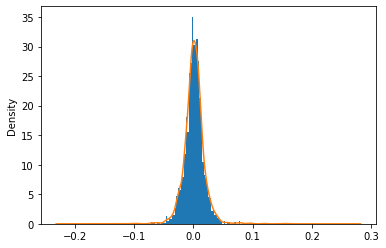

In [30]:
pd_per_2019.pct_change().hist(bins=100,density=True)
pd_per_2019.pct_change().plot.kde()


In [31]:
def kde_model_for_monte(data):
	kde = stats.gaussian_kde(data)
	x_eval = np.linspace(-0.3, 0.3, num=200)

	fig = plt.figure()
	ax = fig.add_subplot(111)
	ax.plot(x_eval, kde.pdf(x_eval), 'k-', label="Scott's Rule")
	x_np=np.zeros(shape=10000)
	for i in range(10000):
		new_sample_tmp = kde.resample(size= 252)
		x_np[i]=(new_sample_tmp+1).prod()
	return x_np


In [32]:
#new_sample=kde.resample(size= 250)
#(new_sample+1).prod()




In [33]:
#new_sample1 = kde.resample(size= 250)
#new_sample == new_sample1


In [34]:
#new_sample1 


In [35]:
#(new_sample1+1).prod()


In [36]:
#x_np=np.zeros(shape=10000)
#for i in range(10000):
#	new_sample_tmp = kde.resample(size= 252)
#	x_np[i]=(new_sample_tmp+1).prod()

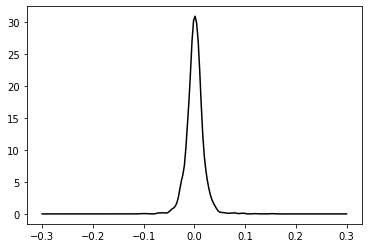

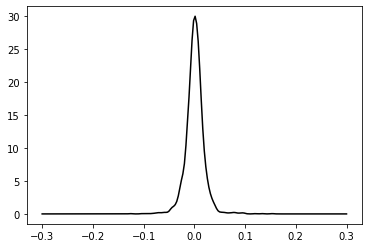

In [37]:
x_np =kde_model_for_monte(s_per_np2019)
x_np1 =kde_model_for_monte(s_per_np2020)

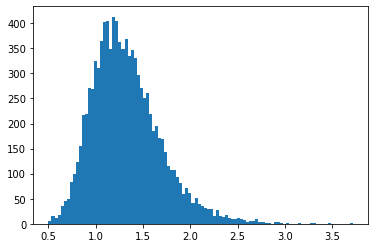

count    10000.000000
mean         1.324687
std          0.363811
min          0.499514
25%          1.069005
50%          1.278388
75%          1.529692
max          3.719094
dtype: float64

In [38]:
plt.hist(x_np,bins=100)
plt.show()
pd.Series(x_np).describe()

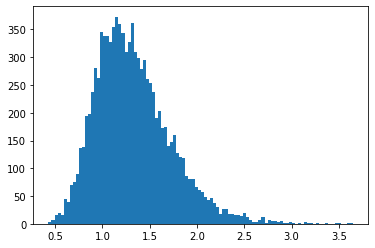

count    10000.000000
mean         1.327410
std          0.399164
min          0.430528
25%          1.040657
50%          1.274240
75%          1.550143
max          3.645977
dtype: float64

In [39]:

plt.hist(x_np1,bins=100)
plt.show()
pd.Series(x_np1).describe()



In [40]:
df3.describe()

,CDNS Close,DJIA Close,Close
count,2528.000000,2528.000000,2528.000000
mean,26.363749,18026.076764,57.928365
std,18.747400,5226.618661,34.132896
min,5.650000,9686.480469,20.460000
25%,12.727500,13196.822754,32.007500
50%,18.835000,17367.370117,44.885000
75%,38.185000,22328.447754,81.667500
max,80.020000,29551.419922,164.990000
